In [2]:
import fanc
import fanc.plotting as fancplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

%matplotlib inline

In /fast/AG_Lupianez/rdoming/anaconda3/envs/hic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /fast/AG_Lupianez/rdoming/anaconda3/envs/hic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /fast/AG_Lupianez/rdoming/anaconda3/envs/hic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /fast/AG_Lupianez/rdoming/anaconda3/envs/hic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be remove

In [3]:
F1F2 = fanc.load("../results/capture/F1F2_limbs/F1F2_limbs.hic@25000@KR")
R1F2 = fanc.load("../results/capture/R1F2_limbs/R1F2_limbs.hic@25000@KR")
ALL = fanc.load("../results/capture/ALL_limbs/ALL_limbs.hic@25000@KR")
DelBs = fanc.load("../results/capture/DelBs_limbs/DelBs_limbs.hic@25000@KR")
DelB = fanc.load("../results/capture/DelB_limbs/DelB_limbs.hic@25000@KR")
F1F2inv = fanc.load("../results/capture/F1F2inv_limbs/inv/F1F2inv_limbs_inv.hic@25000@KR")
R1_4 = fanc.load("../results/capture/R1-4_limbs/R1-4_limbs.hic@25000@KR")

In [4]:
def plotHicTile(hic,title,axis,mask=False,binsize=25000,coords="mm9_Epha4:1-8530004"):
    mat = hic.matrix(coords)
    if mask != False:
        maskbin = [mask[0]//binsize,(mask[1]//binsize+1)]
        mat[maskbin[0]:maskbin[1],:] = 0
        mat[:,maskbin[0]:maskbin[1]] = 0
    vmax = np.percentile(mat.flatten(),97.5)
    sns.heatmap(mat,square=True,vmax=vmax,cmap="germany",ax=axis)
    axis.set_title(title)
    end = int(re.split("[:-]",coords)[2])
    ticks = range(0,len(mat),int(2e6)//binsize)
    ticklabels = ["{}Mb".format(int(x//1e6)) for x in range(0,len(mat)*binsize,int(2e6))]
    axis.set_xticks(ticks)
    axis.set_xticklabels(ticklabels)
    axis.set_yticks(ticks)
    axis.set_yticklabels(ticklabels)
    return(axis)

In [5]:
delb_start = 77858974 - 71000000 - 1469996
delb_end = 78060839 - 71000000 - 1469996

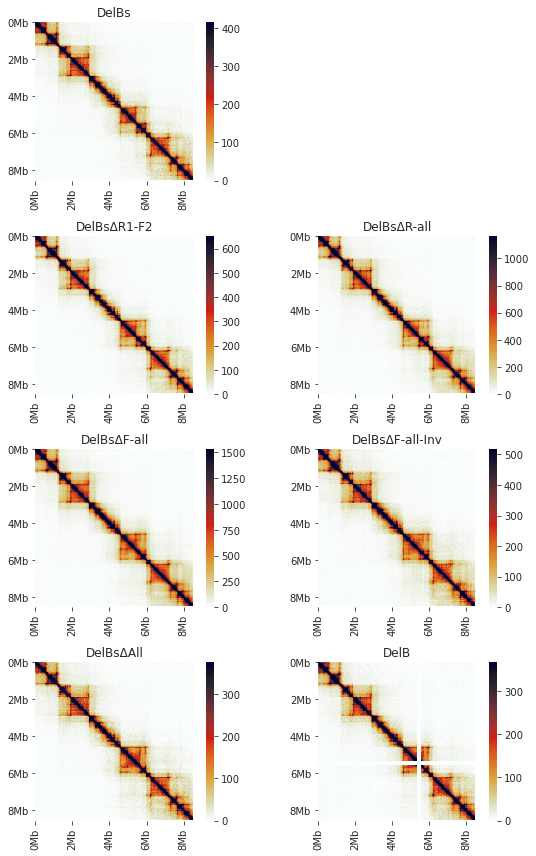

In [6]:
coords = "mm9_Epha4"

fig, ax = plt.subplots(ncols=2,nrows=4,figsize=(8,12))

plotHicTile(DelBs,"DelBs",ax[0][0])
ax[0][1].axis("off")
plotHicTile(R1F2,"DelBsΔR1-F2",ax[1][0])
plotHicTile(R1_4,"DelBsΔR-all",ax[1][1])
plotHicTile(F1F2,"DelBsΔF-all",ax[2][0])
plotHicTile(F1F2inv,"DelBsΔF-all-Inv",ax[2][1])
plotHicTile(ALL,"DelBsΔAll",ax[3][0])
plotHicTile(DelB,"DelB",ax[3][1],mask=[delb_start,delb_end])

plt.tight_layout()
plt.savefig("figurePlots/CaptureWholeRegion.png",dpi=300)